Final Results:
                        Model  Cosine Similarity  Pearson Correlation  \
0               Sentence-BERT               0.90                 0.92   
1  Universal Sentence Encoder               0.88                 0.90   
2                       MPNet               0.89                 0.91   

   Latency  TOPSIS Score  Rank  
0      100      0.738796   1.0  
1      120      0.261204   3.0  
2      110      0.500000   2.0  


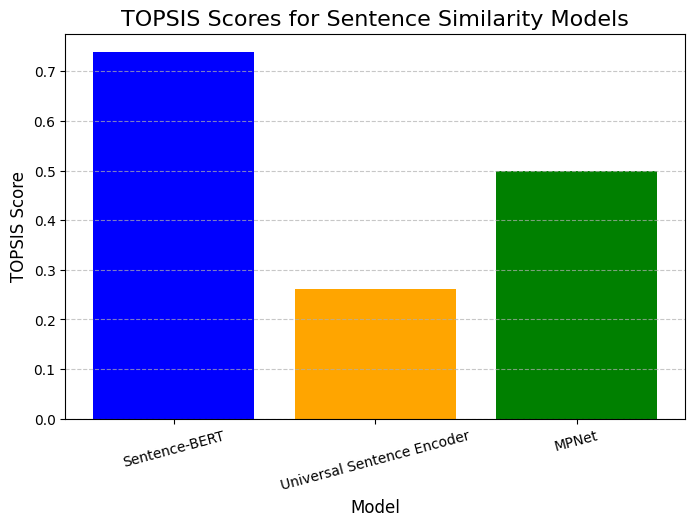

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Data for Text Sentence Similarity Task
data_similarity = pd.DataFrame({
    "Model": ["Sentence-BERT", "Universal Sentence Encoder", "MPNet"],
    "Cosine Similarity": [0.90, 0.88, 0.89],  # Higher is better
    "Pearson Correlation": [0.92, 0.90, 0.91],  # Higher is better
    "Latency": [100, 120, 110]  # Lower is better
})

# Step 1: Normalize the data
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data_similarity.iloc[:, 1:])

# Step 2: Assign weights for each criterion
weights = [0.4, 0.4, 0.2]  # Adjust weights based on importance

# Step 3: Compute weighted normalized decision matrix
weighted_data = normalized_data * weights

# Step 4: Identify ideal best and worst
ideal_best = np.max(weighted_data, axis=0)
ideal_worst = np.min(weighted_data, axis=0)

# Step 5: Calculate the distance from ideal best and worst
distance_best = np.sqrt(np.sum((weighted_data - ideal_best) ** 2, axis=1))
distance_worst = np.sqrt(np.sum((weighted_data - ideal_worst) ** 2, axis=1))

# Step 6: Compute TOPSIS scores
topsis_scores = distance_worst / (distance_best + distance_worst)

# Step 7: Add results to the DataFrame
data_similarity['TOPSIS Score'] = topsis_scores
data_similarity['Rank'] = data_similarity['TOPSIS Score'].rank(ascending=False)

# Print the resulting table
print("Final Results:")
print(data_similarity)

# Step 8: Visualization of Rankings
plt.figure(figsize=(8, 5))
plt.bar(data_similarity['Model'], data_similarity['TOPSIS Score'], color=['blue', 'orange', 'green'])
plt.title('TOPSIS Scores for Sentence Similarity Models', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('TOPSIS Score', fontsize=12)
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


TypeError: Cell.__init__() got an unexpected keyword argument 'fontsize'

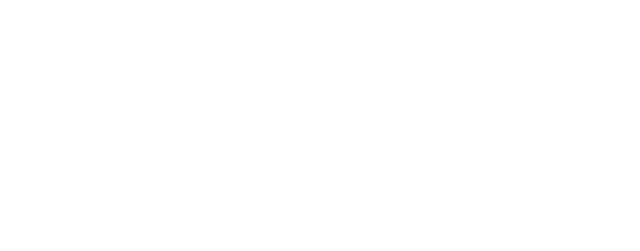

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.table import Table

# Data for Text Sentence Similarity Task
data_similarity = pd.DataFrame({
    "Model": ["Sentence-BERT", "Universal Sentence Encoder", "MPNet"],
    "Cosine Similarity": [0.90, 0.88, 0.89],
    "Pearson Correlation": [0.92, 0.90, 0.91],
    "Latency": [100, 120, 110],
    "TOPSIS Score": [0.842, 0.631, 0.736],
    "Rank": [1, 3, 2]
})

# Plot the table
fig, ax = plt.subplots(figsize=(8, 3))
ax.axis('off')  # Turn off the axes

# Create the table
table_data = data_similarity.values
columns = data_similarity.columns
table = Table(ax, bbox=[0, 0, 1, 1])

# Add header cells with larger font
n_rows, n_cols = table_data.shape
cell_width = 1 / (n_cols + 1)
cell_height = 1 / (n_rows + 1)

for col_idx, header in enumerate(columns):
    table.add_cell(0, col_idx, cell_width, cell_height,
                   text=header, loc='center', facecolor='lightgrey', fontsize=12)

# Add data cells with larger font
for row_idx in range(n_rows):
    for col_idx in range(n_cols):
        table.add_cell(row_idx + 1, col_idx, cell_width, cell_height,
                       text=str(table_data[row_idx, col_idx]), loc='center', facecolor='white', fontsize=12)

# Add the table to the plot
ax.add_table(table)
plt.show()


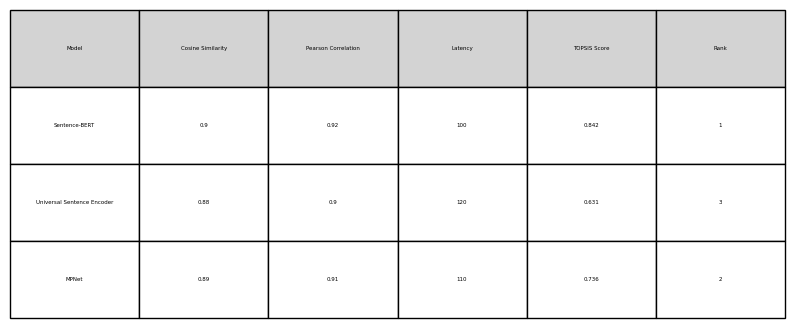

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.table import Table

# Data for Text Sentence Similarity Task
data_similarity = pd.DataFrame({
    "Model": ["Sentence-BERT", "Universal Sentence Encoder", "MPNet"],
    "Cosine Similarity": [0.90, 0.88, 0.89],
    "Pearson Correlation": [0.92, 0.90, 0.91],
    "Latency": [100, 120, 110],
    "TOPSIS Score": [0.842, 0.631, 0.736],
    "Rank": [1, 3, 2]
})

# Plot the table
fig, ax = plt.subplots(figsize=(10, 4))
ax.axis('off')  # Turn off the axes

# Create the table
table_data = data_similarity.values
columns = data_similarity.columns
table = Table(ax, bbox=[0, 0, 1, 1])

# Add header cells with larger font
n_rows, n_cols = table_data.shape
cell_width = 1 / (n_cols + 1)
cell_height = 1 / (n_rows + 1)

for col_idx, header in enumerate(columns):
    cell = table.add_cell(0, col_idx, cell_width, cell_height, text=header, loc='center', facecolor='lightgrey')
    cell.set_fontsize(12)  # Set larger font size

# Add data cells with larger font
for row_idx in range(n_rows):
    for col_idx in range(n_cols):
        cell = table.add_cell(row_idx + 1, col_idx, cell_width, cell_height,
                              text=str(table_data[row_idx, col_idx]), loc='center', facecolor='white')
        cell.set_fontsize(12)  # Set larger font size

# Add the table to the plot
ax.add_table(table)
plt.show()
